# PIC data

In [5]:
from astropy.constants import m_e, e, k_B
k = k_B.value
me = m_e.value
q = e.value
import numpy as np
import matplotlib.pyplot as plt

import json
%matplotlib notebook

from scipy.interpolate import interp1d
from math import ceil
plt.style.use("presentation")

In [6]:
with open("NewPic1D.dat", "r") as f:
    dataPIC = json.load(f)
# with open("PIC_data.dat", "r") as f:
#     dataPIC = json.load(f)
        
with open("NewPIC_EVDFs.dat", "r") as f:
    data = json.load(f)
# with open("PIC_EVDFs.dat", "r") as f:
#     data = json.load(f)
        
print(data.keys())
print("~~~~~~~~~~~~~~~ \n")
print(data["info"])
print("~~~~~~~~~~~~~~~ \n")
print("Run disponibles")
for k in ["0","1","2"]:
    run = data[k]
    print(k," p = ",run["p"], "mTorr")
    
dx = dataPIC["0"]["dx"]

dict_keys(['info', '0', '1', '2', '3', '4', '5'])
~~~~~~~~~~~~~~~ 

Informations
p: pressur un mTorr
probnames: list of the names of the probes (also keys of the dict)
prob_center: center of the prob
in the prob data:
    position: the coords of the bin :ymin, ymax
    absciss: the velocities of the EVDFs (Vx, Vy, Vz)
    EVDF: the EVDFs (Vx, Vy, Vz)

~~~~~~~~~~~~~~~ 

Run disponibles
0  p =  0.1 mTorr
1  p =  2.0 mTorr
2  p =  10.0 mTorr


In [7]:
k = '0'
probnames = np.array(data[k]["probnames"])
prob_center = np.array(data[k]["prob_center"])
prob_y0 = np.array(data[k]["prob_y0"])
prob_y1 = np.array(data[k]["prob_y1"])

print(probnames)
print(prob_center)
dx = data[k]["dx"]*1000


['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012']
[  2.5   7.5  15.   25.   35.   50.   70.   90.  125.  175.  250.  450. ]


In [8]:
def returnxy(pn, k="1"):
    a = np.array(data[k][pn]['absciss'])
    V = np.array(data[k][pn]['EVDF'])
    idenx = 1
    x = a[:,idenx]
    x = x**2*np.sign(x)*me/q/2
    y = V[:,idenx]
    
    index = np.argwhere(pn == probnames)[0][0]
    xcenter = prob_center[index]
    x0 = int(prob_y0[index])
    x1 = int(prob_y1[index])
    
    phi = np.array(dataPIC[k]["phi"])
    pc = interp1d(np.arange(len(phi)),phi)(xcenter)
    p0 = phi[x0]
    p1 = phi[x1]
    
    # p = phi[int(xcenter)]
    return x, y, pc , p0, p1

/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "
No handles with labels found to put in legend.


Text(0.5, 0, '$\\phi$ [V]')

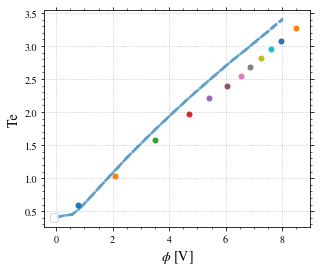

In [6]:
# plot 
plt.figure(figsize=(4.5,4))
plt.subplots_adjust(left=0.17, bottom=0.17, right=0.99, top=0.925, wspace=0.05, hspace=0.25)

ft = 14
s = 2.5

for Nprob in range(len(probnames)):
    
    x, y, phic, phi0, phi1 = returnxy(probnames[Nprob])
    # x, y, phic = returnxy(probnames[Nprob])
    y0sum = (y).max()
    T = np.sum(np.abs(x) * y)/y.sum()*2
    plt.scatter(phic, T)
    
phi = np.array(dataPIC[k]["phi"])
Te = np.array(dataPIC[k]["Te2"])
plt.plot(phi, Te,linewidth=s, alpha=0.7,ls="--" )

# plt.legend( fontsize=ft,loc=(1,0.1 ))
plt.legend(loc = 'lower left', fontsize=11)
plt.grid(alpha=0.5)
plt.ylabel("Te", fontsize=ft)
plt.xlabel("$\phi$ [V]", fontsize=ft)



# Figure 1 :  f(x, v) for 3 different x

<IPython.core.display.Javascript object>


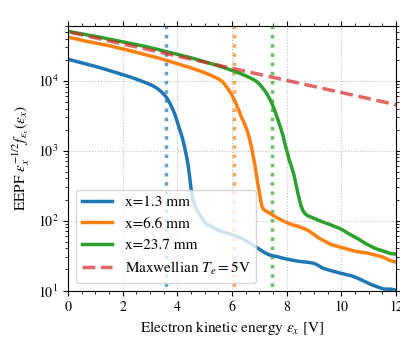

4.348692893981934
4.007628917694092
6.511568069458008
6.340437889099121
7.700623512268066
7.623024940490723


In [33]:
# plot 
plt.figure(figsize=(4,3.5))
plt.subplots_adjust(left=0.17, bottom=0.17, right=0.99, top=0.925, wspace=0.05, hspace=0.25)

ft = 11
s = 2.5

for Nprob in [3,8,-1]:

    x, y, phic, phi0, phi1 = returnxy(probnames[Nprob], k="0")
    y0sum = (y).max()
    print(phi1)
    xtoplot = x[x>0]
    ytoplot = np.exp(0.5*( np.log(y[x>0]+1e-5) + np.log(y[x<0][::-1]+1e-5)))
    ytoplot = (y[x>0] +y[x<0][::-1])
    ytoplot /= (prob_y1[Nprob] - prob_y0[Nprob]) #*5e4
    #ytoplot /=ytoplot.max()
    # ytoplot = y[x>0]
    l,=plt.plot(xtoplot, ytoplot,linewidth=s, label=f"x={prob_center[Nprob]*dx:2.1f} mm")
    # ytoplot = y[x>0]
    # plt.plot(xtoplot, ytoplot/ytoplot.max(),linewidth=s, label=f"x={prob_center[Nprob]*dx:2.1f} mm")
    # ytoplot = y[x<0][::-1]
    # plt.plot(xtoplot, ytoplot/ytoplot.max(),linewidth=s, label=f"x={prob_center[Nprob]*dx:2.1f} mm")
    c = l.get_color()
    print(phic)
    plt.vlines(phi0, 1, 6e4,linewidth=s, linestyles=":", colors=c, alpha=0.7)

    
Te = 5
plt.plot(x, 5e4*np.exp(-x/Te),linewidth=s, alpha=0.7,ls="--" , label=f"Maxwellian $T_e=5$V")



plt.yscale("log")
plt.ylim(10, 6e4)
plt.xlim(0, 12)
# plt.legend( fontsize=ft,loc=(1,0.1 ))
plt.legend(loc = 'lower left', fontsize=11)
plt.grid(alpha=0.5)
plt.ylabel("EEPF $ \epsilon_x^{-1/2} f_{\epsilon_x}(\epsilon_x)$", fontsize=ft)
plt.xlabel("Electron kinetic energy $\epsilon_x$ [V]", fontsize=ft)
plt.savefig("../figure/EVDFs.pdf")



<IPython.core.display.Javascript object>


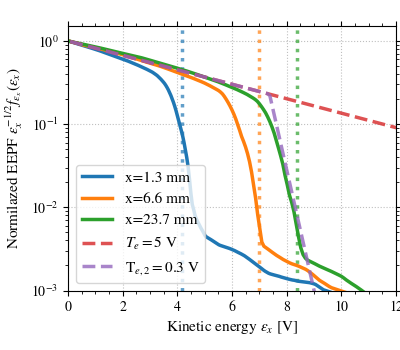

5.090732574462891
4.17315673828125
7.443304061889648
6.987137794494629
8.550169944763184
8.394161224365234


In [32]:
# plot 
plt.figure(figsize=(4,3.5))
plt.subplots_adjust(left=0.17, bottom=0.17, right=0.99, top=0.925, wspace=0.05, hspace=0.25)

ft = 11
s = 2.5

for Nprob in [3,8,-1]:

    x, y, phic, phi0, phi1 = returnxy(probnames[Nprob])
    y0sum = (y).max()
    print(phi1)
    xtoplot = x[x>0]
    ytoplot = np.exp(0.5*( np.log(y[x>0]+1e-5) + np.log(y[x<0][::-1]+1e-5)))
    ytoplot = (y[x>0] +y[x<0][::-1])
    # ytoplot = y[x>0]
    l,=plt.plot(xtoplot, ytoplot/ytoplot.max(),linewidth=s, label=f"x={prob_center[Nprob]*dx:2.1f} mm")
    # ytoplot = y[x>0]
    # plt.plot(xtoplot, ytoplot/ytoplot.max(),linewidth=s, label=f"x={prob_center[Nprob]*dx:2.1f} mm")
    # ytoplot = y[x<0][::-1]
    # plt.plot(xtoplot, ytoplot/ytoplot.max(),linewidth=s, label=f"x={prob_center[Nprob]*dx:2.1f} mm")
    c = l.get_color()
    print(phi0)
    plt.vlines(phi0, 1e-3, 2,linewidth=s, linestyles=":", colors=c, alpha=0.7)

    
Te = 5
plt.plot(x, np.exp(-x/Te),linewidth=s, alpha=0.8,ls="--" , label=f"$T_e=5$ V")

def twoTe(v, phi, T1=5, T2=0.1):
    f = np.empty_like(v)
    f[v<phi] = np.exp(-v[v<phi]/T1)
    f[v>phi] = np.exp(-(v[v>phi]-phi)/T2)*np.exp(-phi/T1)
    return f

plt.plot(x, twoTe(x, phic*0.87, T1=5, T2=0.3),linewidth=s, alpha=0.8,ls="--" , label=f"T$_{{e, 2}}=0.3$ V")


plt.yscale("log")
plt.ylim(10e-4, 1.5)
plt.xlim(0, 12)
# plt.legend( fontsize=ft,loc=(1,0.1 ))
plt.legend(loc = 'lower left', fontsize=11)
plt.grid(alpha=0.5)
plt.ylabel("Normilazed EEPF $ \epsilon_x^{-1/2} f_{\epsilon_x}(\epsilon_x)$", fontsize=ft)
plt.xlabel("Kinetic energy $\epsilon_x$ [V]", fontsize=ft)
plt.savefig("../figure/EVDFs_and2Te.pdf")



# Figure 2: foward and backward

/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


23.671751709626516
7.700623512268066
7.458524703979492


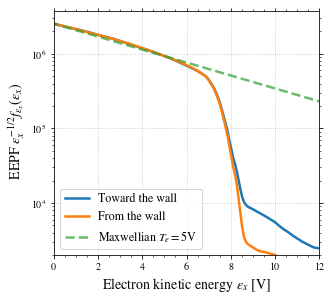

In [5]:
# plot 
plt.figure(figsize=(4.5,4.5))
plt.subplots_adjust(left=0.17, bottom=0.17, right=0.99, top=0.925, wspace=0.05, hspace=0.25)

ft = 14
s = 2.5

for Nprob in [-1]:
    print(prob_center[Nprob]*dx)
    
    x, y, phic, phi0, phi1 = returnxy(probnames[Nprob], k="0")
    y0sum = (y).max()
    print(phi1)
    print(phi0)
    
    xtoplot = x[x>0]
    ytoplot = y[x>0]
    # ytoplot = y[x>0]
    l,=plt.plot(xtoplot, ytoplot,linewidth=s, label=f"Toward the wall")
    
    xtoplot = -x[x<0]
    ytoplot = y[x<0]
    # ytoplot = y[x>0]
    l,=plt.plot(xtoplot, ytoplot,linewidth=s, label=f"From the wall")
    # ytoplot = y[x>0]
    # plt.plot(xtoplot, ytoplot/ytoplot.max(),linewidth=s, label=f"x={prob_center[Nprob]*dx:2.1f} mm")
    # ytoplot = y[x<0][::-1]
    # plt.plot(xtoplot, ytoplot/ytoplot.max(),linewidth=s, label=f"x={prob_center[Nprob]*dx:2.1f} mm")
    c = l.get_color()
    plt.vlines(phic, 1e-3, 2,linewidth=s, linestyles=":", colors=c, alpha=0.7)

    
Te = 5
plt.plot(x, ytoplot[-1]*np.exp(-x/Te),linewidth=s, alpha=0.7,ls="--" , label=f"Maxwellian $T_e={Te}$V")



plt.yscale("log")
plt.ylim(2e3, 1.5*ytoplot[-1])
plt.xlim(0, 12)
# plt.legend( fontsize=ft,loc=(1,0.1 ))
plt.legend(loc = 'lower left', fontsize=12)
plt.grid(alpha=0.5)
plt.ylabel(" EEPF $ \epsilon_x^{-1/2} f_{\epsilon_x}(\epsilon_x)$", fontsize=ft)
plt.xlabel("Electron kinetic energy $\epsilon_x$ [V]", fontsize=ft)
plt.savefig("../figures/EVDFpm.pdf")



# Figure 3 : verifying the vlasov eq.

4.690723419189453
8.474443435668945


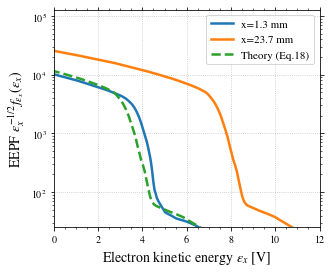

In [40]:
# plot 
normilize = False

plt.figure(figsize=(4.5,4))
plt.subplots_adjust(left=0.17, bottom=0.17, right=0.99, top=0.925, wspace=0.05, hspace=0.25)

ft = 14
s = 2.5
Nprob = 3

x, y, phi1, p0,p1 = returnxy(probnames[Nprob])
y0max = y.max()
print(phi1)
if normilize:
    ytoplot =  y/y.max()
else:
    ytoplot =  y/(prob_y1[Nprob] - prob_y0[Nprob])
    ytoplot = (ytoplot[x>0] +ytoplot[x<0][::-1])/2

xtoplot = x[x>0]
    
plt.plot(xtoplot,ytoplot ,linewidth=s, label=f"x={prob_center[Nprob]*dx:2.1f} mm")
# plt.vlines(phi1, 1e-3, 1)

Nprob = -1
x, y, phi0, p0,p1 = returnxy(probnames[Nprob])
y1max = y.max()

if normilize:
    ytoplot2 =  y/y.max()
else:
    ytoplot2 =  y/(prob_y1[Nprob] - prob_y0[Nprob])
    ytoplot2 = (ytoplot2[x>0] +ytoplot2[x<0][::-1])/2
xtoplot = x[x>0]

plt.plot(xtoplot, ytoplot2,linewidth=s, label=f"x={prob_center[Nprob]*dx:2.1f} mm")
print(phi0)
# plt.vlines(phi0, 1e-3, 1)

xtoplot = x[x>0]
xshift = xtoplot-(phi0 - phi1)*1.1
if normilize:
    ytoplot3 =  y/y[np.argmin(np.abs(xshift))]
else:
    ytoplot3 =  y/(prob_y1[Nprob] - prob_y0[Nprob])
    ytoplot3 = (ytoplot3[x>0] +ytoplot3[x<0][::-1])/2

plt.plot(xshift, ytoplot3, linewidth=s, linestyle="--",
         label="Theory (Eq.18)")#=f"x={prob_center[Nprob]*dx:2.1f} mm shifted")

plt.yscale("log")
if normilize:
    plt.ylim(17e-4, 1.5)
else:
    ym = max(ytoplot.max(), ytoplot2.max())
    plt.ylim(ym*10e-4, ym*5)
    
plt.xlim(0, 12)
# plt.legend( fontsize=ft,loc=(1,0.1 ))
# plt.legend(loc = 'lower left', fontsize=11)
plt.legend(loc = 'best', fontsize=11)
plt.grid(alpha=0.5)
plt.ylabel("EEPF $ \epsilon_x^{-1/2} f_{\epsilon_x}(\epsilon_x)$", fontsize=ft)
plt.xlabel("Electron kinetic energy $\epsilon_x$ [V]", fontsize=ft)
plt.savefig("../figures/EVDFshift.pdf")

